# Data Visualization for Exploration with `taladrod` Dataset

This notebook details data visualization for exploring a dataset. The goal is to understand more about the data as a human, not to make beautiful graphs, communicate, or feature engineering input into models.

In [1]:
#reload scripts when we edit them
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy.stats as st

#ggplot equivalent: plotnine
from plotnine import *

#scales package equivalent: mizani
from mizani.breaks import *
from mizani.formatters import *

#widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#utility
import utils

#stop the annoying warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
'''
Snippet for plotnine with thai font by @korakot
https://gist.github.com/korakot/01d181229b21411b0a20784e0ca20d3d
'''
import matplotlib
# !wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -q
# !cp thsarabunnew-webfont.ttf /usr/share/fonts/truetype/
matplotlib.font_manager._rebuild()
matplotlib.rc('font', family ='TH Sarabun New')
theme_set(theme_minimal(11, 'TH Sarabun New'));

In [3]:
df = pd.read_csv('data/taladrod/taladrod.csv')
df.head()

,brand,series,gen,year,color,gear,gas,sales_price,original_price,market_price,description,contact_location,subscribers,date_diff,dow
0,BMW,others,others,2013.0,สีขาว,เกียร์ออโต้,xxna,1090000.0,2697000.0,2697000.0,BMW 320i Modern ปี 2013 รถมือเดียวภายในภายนอกด...,กรุงเทพ,858.0,NaN,2
1,TOYOTA,others,others,2009.0,สีขาว,เกียร์ออโต้,LPG,489000.0,NaN,NaN,ฟรีดาวนventury G ออโต้ปี2011รถสวยมากมือเดียวไม...,กรุงเทพ,137.0,NaN,2
2,BENZ,others,others,2004.0,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,999000.0,NaN,NaN,E55 AMG V8 SuperCharge Tune by Zugus 500hp++ 7...,นนทบุรี,960.0,NaN,2
3,others,others,others,2011.0,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,839000.0,1978000.0,1978000.0,HYUNDAI GRAND STAREX 2.5 VIP ปี 2011\n- auto a...,กรุงเทพ,74.0,NaN,2
4,others,others,others,2001.0,สีดำ,เกียร์ออโต้,xxna,655000.0,NaN,NaN,ขายLand Rover Discovery 2 ปี 2001 เบนซิน วิ่งด...,กรุงเทพ,60.0,NaN,2


## Warming Up: Missing Values

We use grammar of graphics implementation `ggplot` (ported to Python as `plotnine`) to explore the `taladrod` dataset. Grammar of graphics is an especially useful tool since we do not know exactly what kind of plots we want to see and want to be able to add them up as we go.

![Grammar of Graphics](images/ggpyramid.png)
Source: [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)

In [4]:
df_dirty = pd.read_csv('data/taladrod/taladrod_dirty.csv')
missing = utils.check_missing(df_dirty)
missing['over90'] = missing.per_missing.map(lambda x: True if x>0.9 else False)
missing

,col,per_missing,over90
0,original_price,0.991266,True
1,gas,0.935968,True
2,removed_date,0.889504,False
3,market_price,0.557618,False
4,subscribers,0.000549,False
5,model,0.000000,False
6,gen,0.000000,False
7,year,0.000000,False
8,color,0.000000,False
9,gear,0.000000,False


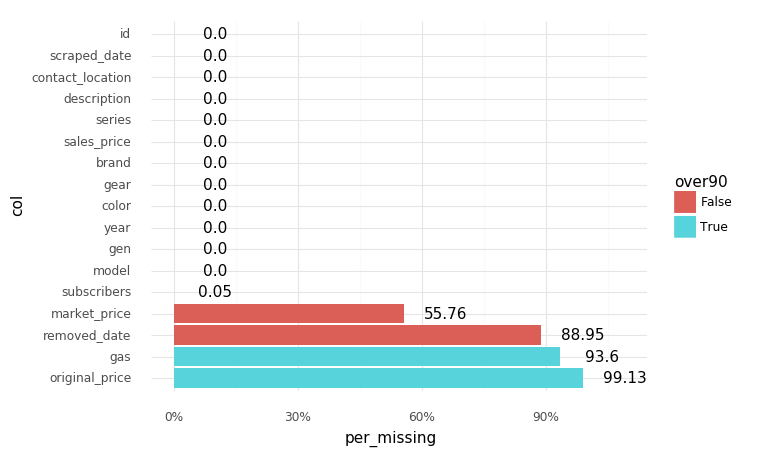

<ggplot: (8784373945257)>

In [5]:
g = (ggplot(missing,aes(x='col',y='per_missing',fill='over90')) + #base plot
     geom_col() + #type of plot 
     geom_text(aes(x='col',y='per_missing+0.1',label='round(100*per_missing,2)')) +#annotate
     scale_y_continuous(labels=percent_format()) + #y-axis tick
     theme_minimal() + coord_flip()#theme and flipping plot
    )
g

## Categorical Variables

We want to know primarily two things about our categorical variables:
1. How each variable is distributed
2. How each variable relate to the dependent variable
    * 2.1 when dependent variable is numerical
    * 2.2 when dependent variable is categorical

In [6]:
cat_vars = ['brand', 'series', 'gen', 'color', 'gear', 'gas','contact_location', 'dow']
cat_df = df[cat_vars].copy()
cat_df.head()

,brand,series,gen,color,gear,gas,contact_location,dow
0,BMW,others,others,สีขาว,เกียร์ออโต้,xxna,กรุงเทพ,2
1,TOYOTA,others,others,สีขาว,เกียร์ออโต้,LPG,กรุงเทพ,2
2,BENZ,others,others,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,นนทบุรี,2
3,others,others,others,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,กรุงเทพ,2
4,others,others,others,สีดำ,เกียร์ออโต้,xxna,กรุงเทพ,2


### Value Distribution

Even without plotting them out, we can see the value distribution in each variable using `ipywidgets`.

In [7]:
interact(utils.value_dist, df =fixed(cat_df),
         col = widgets.Dropdown(options=list(cat_df.columns),value='brand'))

interactive(children=(Dropdown(description='col', options=('brand', 'series', 'gen', 'color', 'gear', 'gas', '…

<function utils.value_dist(df, col)>

**Coding Assignment** Implement `cat_plot` function that plots value distribution for each categorical variable.

In [8]:
def cat_plot(df,col):
    return utils.cat_plot(df,col) 
#input dataframe and column
#output histogram plot of value distribution

interact(cat_plot, df=fixed(cat_df),
         col = widgets.Dropdown(options=list(cat_df.columns),value='brand'))

interactive(children=(Dropdown(description='col', options=('brand', 'series', 'gen', 'color', 'gear', 'gas', '…

<function __main__.cat_plot(df, col)>

In [9]:
#excluding others
def cat_plot_noothers(df,col):
    x = df.copy()
    x = x[x[col]!='others']
    return utils.cat_plot(x,col) 

interact(cat_plot_noothers, df=fixed(cat_df),
         col = widgets.Dropdown(options=list(cat_df.columns),value='gen'))

interactive(children=(Dropdown(description='col', index=2, options=('brand', 'series', 'gen', 'color', 'gear',…

<function __main__.cat_plot_noothers(df, col)>

### Numerical and Categorical Variables

In [10]:
#relationship between dependent variable and categorical variable
cat_df['sales_price'] = utils.boxcox(df['sales_price'])
cat_df.head()

,brand,series,gen,color,gear,gas,contact_location,dow,sales_price
0,BMW,others,others,สีขาว,เกียร์ออโต้,xxna,กรุงเทพ,2,13.883170
1,TOYOTA,others,others,สีขาว,เกียร์ออโต้,LPG,กรุงเทพ,2,13.058360
2,BENZ,others,others,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,นนทบุรี,2,13.794288
3,others,others,others,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,กรุงเทพ,2,13.615841
4,others,others,others,สีดำ,เกียร์ออโต้,xxna,กรุงเทพ,2,13.361382


In [11]:
#relationship between sales price and color
cat_df.groupby('color').sales_price.describe()

,count,mean,std,min,25%,50%,75%,max
color,,,,,,,,
others,1756.0,12.568359,1.019319,0.000000,12.072547,12.542548,13.028055,16.905644
สีขาว,4207.0,13.085453,0.940839,0.000000,12.672950,13.005832,13.498058,16.438729
สีดำ,2848.0,13.071142,0.913027,0.000000,12.594734,13.014780,13.535466,16.111071
สีน้ำตาล,607.0,12.660002,0.814474,8.853808,12.144203,12.782689,13.140205,15.635210
สีบรอนซ์เงิน,1879.0,12.760100,0.923268,0.000000,12.421188,12.779876,13.151924,15.854130
สีเทา,2740.0,12.786451,0.957211,0.000000,12.421188,12.818555,13.188621,17.822480


**Coding Assignment** Implement `numcat_plot` function that plots the relationship between a dependent numerical variable and an independent categorical as displayed above. Useful geoms are `geom_boxplot`, `geom_violin` and `geom_jitter`. Optionally remove outliers before plotting.

In [12]:
def numcat_plot(df,num,cat, no_outliers=True, geom=geom_boxplot()):
    return utils.numcat_plot(df, num, cat, no_outliers, geom) 
#plot the summary above

In [13]:
interact(numcat_plot, 
         df=fixed(cat_df),
         num=fixed('sales_price'),
         no_outliers = widgets.Checkbox(value=True),
         geom=fixed(geom_boxplot()), #geom_violin, geom_jitter
         cat= widgets.Dropdown(options=list(cat_df.columns)[:-1],value='gen'))

interactive(children=(Dropdown(description='cat', index=2, options=('brand', 'series', 'gen', 'color', 'gear',…

<function __main__.numcat_plot(df, num, cat, no_outliers=True, geom=<plotnine.geoms.geom_boxplot.geom_boxplot object at 0x7fd455acd438>)>

In [14]:
interact(numcat_plot, 
         df=fixed(cat_df),
         num=fixed('sales_price'),
         no_outliers = widgets.Checkbox(value=True),
         geom=fixed(geom_violin()), #geom_violin, geom_jitter
         cat= widgets.Dropdown(options=list(cat_df.columns)[:-1],value='gear'))

interactive(children=(Dropdown(description='cat', index=4, options=('brand', 'series', 'gen', 'color', 'gear',…

<function __main__.numcat_plot(df, num, cat, no_outliers=True, geom=<plotnine.geoms.geom_boxplot.geom_boxplot object at 0x7fd455acd438>)>

Sometimes we want to see the numerical distribution filled with categories. This is especially useful plotting the results of a binary classification.

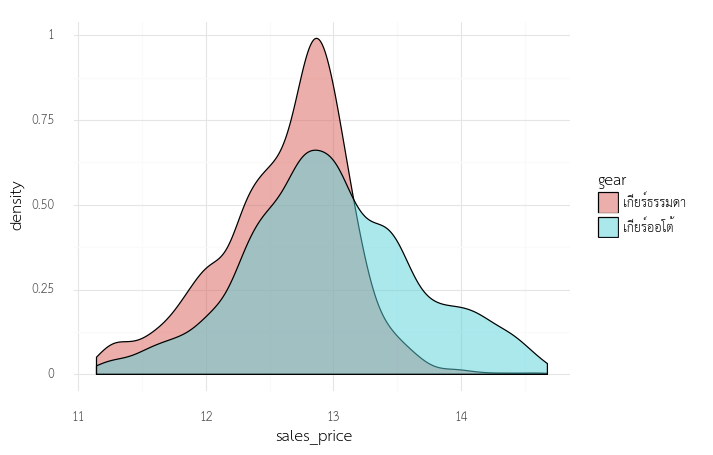

<ggplot: (8784371706972)>

In [15]:
def numdist_plot(df, num,cat, geom=geom_density(alpha=0.5), no_outliers=True):
    return utils.numdist_plot(df, num, cat, geom, no_outliers)

#either
#density: geom_density(alpha=0.5)
#histogram: geom_histogram(binwidth=0.5, position='identity',alpha=0.5) 
#position: identity or dodge
numdist_plot(cat_df,'sales_price','gear')

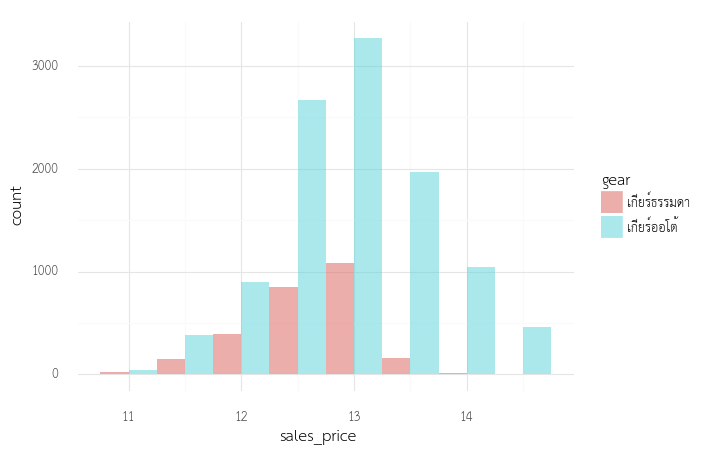

<ggplot: (8784371733992)>

In [16]:
numdist_plot(cat_df,'sales_price','gear',
             geom=geom_histogram(binwidth=0.5, position='dodge',alpha=0.5))

### Categorical and Categorical Variables

**Exercise** We can cross-tabulate categorical variables to see their relationship by using `facet_wrap`; for instance, if our dependent variable is `gear` and indpendent variable of interest is `color`.

In [17]:
def catcat_plot(df, cat_dep, cat_ind):
    return utils.catcat_plot(df,cat_dep,cat_ind)

In [18]:
interact(catcat_plot, 
         df=fixed(cat_df),
         cat_dep=widgets.Dropdown(options=list(cat_df.columns)[:-1],value='gear'),
         cat_ind= widgets.Dropdown(options=list(cat_df.columns)[:-1],value='color'))

interactive(children=(Dropdown(description='cat_dep', index=4, options=('brand', 'series', 'gen', 'color', 'ge…

<function __main__.catcat_plot(df, cat_dep, cat_ind)>

### Multiple Ways of Relationships

You can use `facet_grid` to display multiple ways of relationships; but keep in mind that this is probably what your model is doing anyways so it might not be most human-readable plot to explore.

In [19]:
df.head()

,brand,series,gen,year,color,gear,gas,sales_price,original_price,market_price,description,contact_location,subscribers,date_diff,dow
0,BMW,others,others,2013.0,สีขาว,เกียร์ออโต้,xxna,1070001.0,2697000.0,2697000.0,BMW 320i Modern ปี 2013 รถมือเดียวภายในภายนอกด...,กรุงเทพ,858.0,NaN,2
1,TOYOTA,others,others,2009.0,สีขาว,เกียร์ออโต้,LPG,469001.0,NaN,NaN,ฟรีดาวนventury G ออโต้ปี2011รถสวยมากมือเดียวไม...,กรุงเทพ,137.0,NaN,2
2,BENZ,others,others,2004.0,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,979001.0,NaN,NaN,E55 AMG V8 SuperCharge Tune by Zugus 500hp++ 7...,นนทบุรี,960.0,NaN,2
3,others,others,others,2011.0,สีบรอนซ์เงิน,เกียร์ออโต้,xxna,819001.0,1978000.0,1978000.0,HYUNDAI GRAND STAREX 2.5 VIP ปี 2011\n- auto a...,กรุงเทพ,74.0,NaN,2
4,others,others,others,2001.0,สีดำ,เกียร์ออโต้,xxna,635001.0,NaN,NaN,ขายLand Rover Discovery 2 ปี 2001 เบนซิน วิ่งด...,กรุงเทพ,60.0,NaN,2


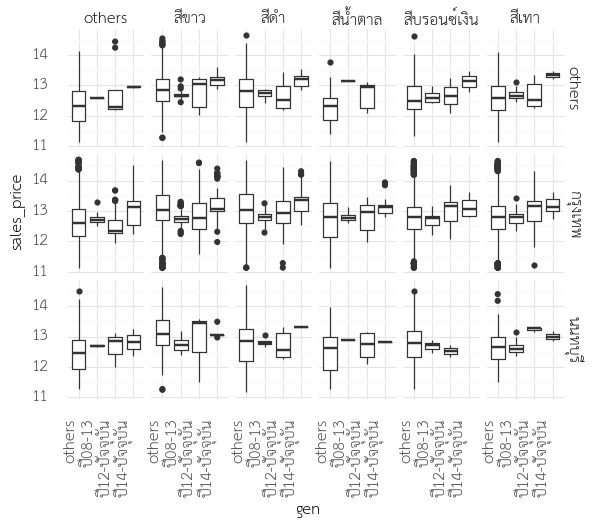

<ggplot: (-9223363252506597351)>

In [37]:
#getting fancy; not necessarily the best idea
new_df = utils.remove_outliers(cat_df,'sales_price')
g = (ggplot(new_df, aes(x='gen',y='sales_price')) +
     geom_boxplot() + theme_minimal() +
     facet_grid('contact_location~color') +
     theme(axis_text_x = element_text(angle = 90, hjust = 1)) +
     theme(text=element_text(size=11,  family='TH Sarabun New')) 
    ) 
g

## Numerical Variables

We want to know two things about numerical variables:
1. Their distributions
2. Their relationships with one another; possibly this involves transforming variables to make them less skewed aka more difficult to see variations

In [21]:
import datetime
now = datetime.datetime.now()
df['nb_year'] = now.year - df['year']
num_vars = ['nb_year','sales_price','market_price','subscribers']
num_df = df[num_vars].dropna() #this is why you need to deal with missing values BEFORE exploration
num_df.describe()

,nb_year,sales_price,market_price,subscribers
count,6150.000000,6.150000e+03,6.150000e+03,6150.000000
mean,4.512195,7.120724e+05,1.333557e+06,525.634959
std,2.026358,7.745356e+05,1.288468e+06,386.841217
min,0.000000,1.000000e+00,3.690000e+05,1.000000
25%,3.000000,3.390010e+05,6.490000e+05,191.250000
50%,5.000000,4.790010e+05,8.770000e+05,423.000000
75%,6.000000,7.590010e+05,1.445000e+06,772.000000
max,8.000000,1.297000e+07,1.645000e+07,1469.000000


`seaborn` has an excellent `pairplot` implementation which not only shows the distribution of values but also their relathionships. It seems like we can get what we want easily; however, as we can see `sales_price` and `market_price` are a little skewed, making it more difficult to see their relationships with other more spread out variables.

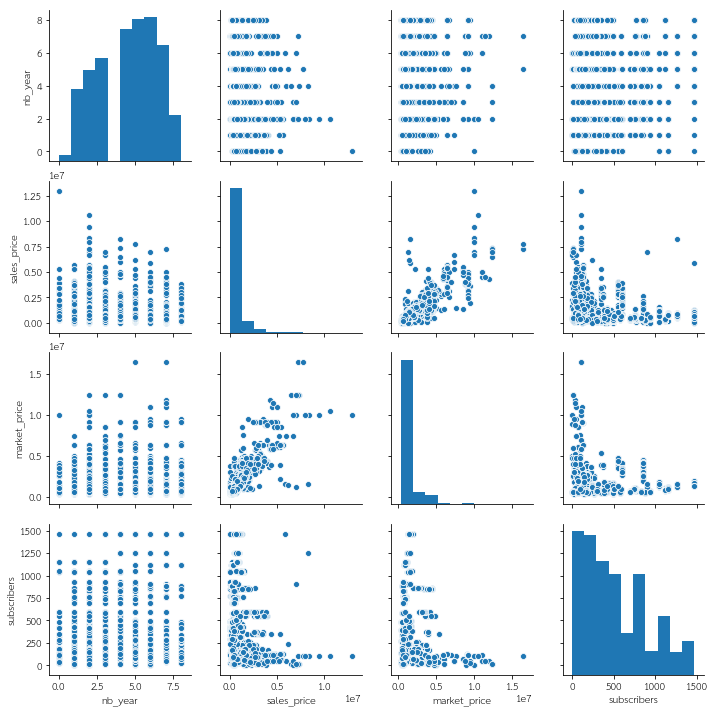

In [22]:
import seaborn as sns
sns.pairplot(num_df) #non-normal data is a problem!

In a lot of cases, a variable with normally distributed values have more variations and easier for us to see their relationships with other variables. We will try to transform our skewed variables to more "normal" ones to see if that helps.

**Q-Q plot** compares two probability distributions by plotting their quantiles against each other. We can use this to determine the normality of a variable by plotting the sample quantiles (from the data we have) against its theoretical quantiles (where the quantiles would be if the variable is normally distributed).

In [23]:
interact(utils.qq_plot, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns)))

interactive(children=(Dropdown(description='col', options=('nb_year', 'sales_price', 'market_price', 'subscrib…

<function utils.qq_plot(df, col)>

**Box-Cox transformation** is a statistical technique used to make data look like more normally distributed.

\begin{align}
g_\lambda(y) = \left\{
\begin{array}{lr}\displaystyle\frac{y^\lambda - 1}{\lambda} &  \lambda \neq 0\\
        & \\
       \log(y) &  \lambda = 0
     \end{array}
   \right.
\end{align}

**Exercise** Implement `boxcox` transformation according to the equation above.

In [24]:
def boxcox(ser,lamb=0):
    pass
#input a column from pandas dataframe
#output transformed column

One way of choosing the hyperparameter $\lambda$ is to look at the Q-Q plot and choose transformation which makes the slope closest to 1.

In [25]:
#see transformation results
def what_lamb(df,col,lamb):
    sample_df = df.copy()
    former_g = utils.qq_plot(sample_df,col)
    sample_df[col] = utils.boxcox(sample_df[col],lamb)
    print(utils.qq_plot(sample_df,col),former_g)
    
interact(what_lamb, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         lamb=widgets.FloatSlider(min=-3,max=3,step=0.5,value=0)
         )

interactive(children=(Dropdown(description='col', index=1, options=('nb_year', 'sales_price', 'market_price', …

<function __main__.what_lamb(df, col, lamb)>

This can also be automated by plotting a slope for each arbitary $\lambda$; for instance from -3 to 3.

In [26]:
lamb_df = utils.boxcox_lamb_df(num_df.subscribers)
interact(utils.boxcox_plot, df=fixed(num_df),
         col=widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         ls=fixed([i/10 for i in range(-30,31,5)])
         )

interactive(children=(Dropdown(description='col', index=1, options=('nb_year', 'sales_price', 'market_price', …

<function utils.boxcox_plot(df, col, ls=[-3.0, -2.5, -2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])>

In [27]:
#transform sales and market prices
for col in ['sales_price','market_price']:
    num_df['new_'+col] = utils.boxcox(num_df[col], utils.boxcox_lamb(num_df[col]))

You can see that post transformation, we can see the (lack of) relationships between variables clearer.

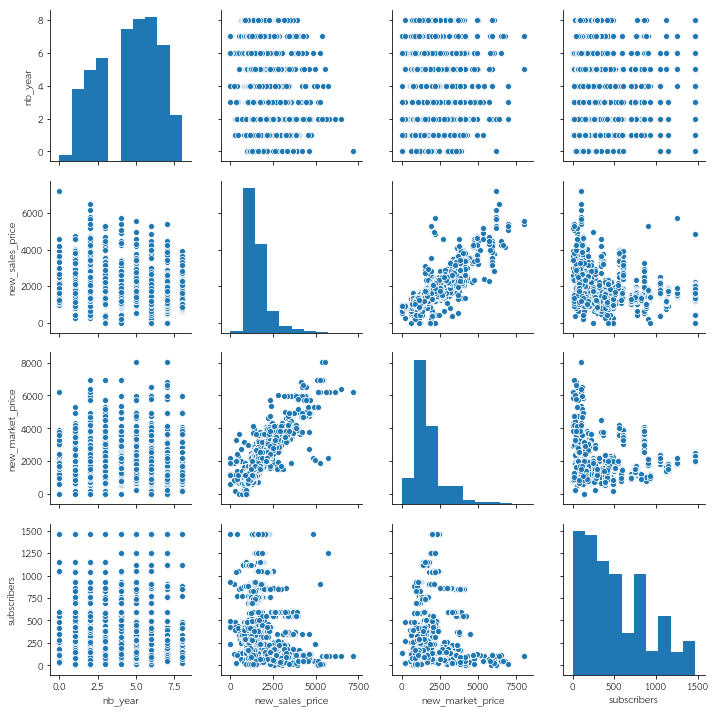

In [28]:
sns.pairplot(num_df[['nb_year','new_sales_price','new_market_price','subscribers']]) #a little better!

For our example, we have only four numerical variables; but imagine when you have ten or more. You may want to plot their distributions separately from relationships.

In [29]:
num_m = num_df.melt()
num_m.head()

,variable,value
0,nb_year,6.0
1,nb_year,8.0
2,nb_year,8.0
3,nb_year,2.0
4,nb_year,3.0


**Coding Assignment** Implement `value_dist_plot` to plot value distribution of all variables.

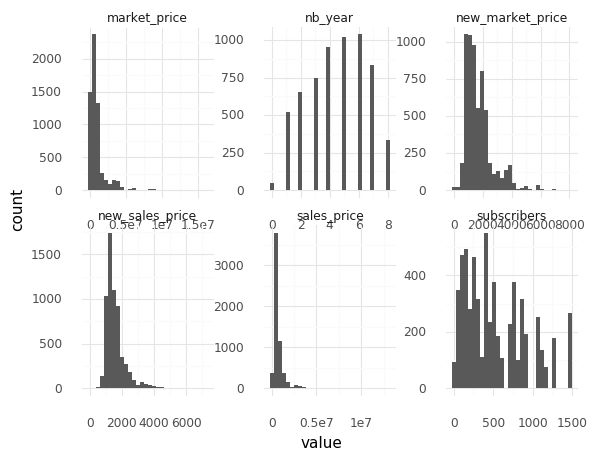

<ggplot: (8784363633037)>

In [30]:
def value_dist_plot(df,bins=30):
    return utils.value_dist_plot(df,bins)
#input dataframe with only numerical variables
#output distribution plot for each variable
value_dist_plot(num_df)

Likewise in case there are too many pairs of relationships, you might plot the relationships pair-by-pair with `ipywidget` and `seaborn`'s `jointplot` function.

In [31]:
interact(utils.jointplot, df=fixed(num_df),
         col_x= widgets.Dropdown(options=list(num_df.columns),value='sales_price'),
         col_y=widgets.Dropdown(options=list(num_df.columns),value='market_price'),
         kind=widgets.Dropdown(options=['scatter','resid','reg','hex','kde','point'],value='scatter'))

interactive(children=(Dropdown(description='col_x', index=1, options=('nb_year', 'sales_price', 'market_price'…

<function utils.jointplot(df, col_x, col_y, no_outliers=True, kind='reg')>

As you might have noticed, we have not used any statistical concept to describe the relationship, and that is by design. We can also see correlation table with a simple `pandas` function:

In [32]:
#correlation plot if you must; but it's just ONE number for the relationship
num_df.corr(method='pearson').style.background_gradient(cmap='coolwarm') 

,nb_year,sales_price,market_price,subscribers,new_sales_price,new_market_price
nb_year,1,-0.220633,-0.00786656,0.163404,-0.275434,-0.0152819
sales_price,-0.220633,1,0.862739,-0.07795,0.955499,0.819534
market_price,-0.00786656,0.862739,1,-0.063786,0.858924,0.948289
subscribers,0.163404,-0.07795,-0.063786,1,-0.0165204,0.039791
new_sales_price,-0.275434,0.955499,0.858924,-0.0165204,1,0.882803
new_market_price,-0.0152819,0.819534,0.948289,0.039791,0.882803,1


In [33]:
def pearson_corr(x,y):
    sub_x = x - x.mean()
    sub_y = y - y.mean()
    return (sub_x * sub_y).sum() / np.sqrt((sub_x**2).sum() * (sub_y**2).sum())

#spearman and kendall: pearson with rank variables
pearson_corr(df.nb_year,df.sales_price)

-0.23316757399518453

However, the famous Anscombe plots show us that it is always better to look at distribution rather than a summary number.

![Anscombe's Quartet](images/anscombe.png)

Source: [A Comprehensive Guide to the Grammar of Graphics for Effective Visualization of Multi-dimensional Data](https://towardsdatascience.com/a-comprehensive-guide-to-the-grammar-of-graphics-for-effective-visualization-of-multi-dimensional-1f92b4ed4149)